<a href="https://colab.research.google.com/github/alanwuha/ce7455-nlp/blob/master/intro_to_panda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to pandas

__Learning Objectives:__
- Gain an introduction to the `DataFrame` and `Series` data structures of the _pandas_ library
- Access and manipulate data within a `DataFrame` and `Series`
- Import CSV data into a _pandas_ `DataFrame`
- Reindex a `DataFrame` to shuffle data

# Basic Concepts

The following line imports the _pandas_ API and prints the API version:

In [2]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.25.3'

The primary data structures in _pandas_ are implemented as two classes:

- `DataFrame`, which you can imagine as a relational data table, with rows and named columns.
- `Series`, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](#) and [R](#).

One way to create a `Series` is to construct a `Series` object. For example:

In [0]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

In [0]:
pd.Series(['NUS', 'NTU', 'SMU'])

0    NUS
1    NTU
2    SMU
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](#) values. Example:

In [3]:
school_names = pd.Series(['National University of Singapore', 'Nanyang Technological University', 'Singapore Management University'])
population = pd.Series([33000, 32000, 18000])

pd.DataFrame({ 'School name': school_names, 'Population': population })

,School name,Population
0,National University of Singapore,33000
1,Nanyang Technological University,32000
2,Singapore Management University,18000


But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
california_housing_dataframe = pd.read_csv("/content/drive/My Drive/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7fd965978>]],
      dtype=object)

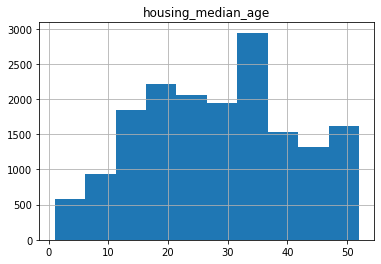

In [15]:
california_housing_dataframe.hist('housing_median_age')

# Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [16]:
schools = pd.DataFrame({ 'School name': school_names, 'Population': population })
print(type(schools['School name']))
schools['School name']

<class 'pandas.core.series.Series'>


0    National University of Singapore
1    Nanyang Technological University
2     Singapore Management University
Name: School name, dtype: object

In [17]:
print(type(schools['School name'][1]))
schools['School name'][1]

<class 'str'>


'Nanyang Technological University'

In [19]:
print(type(schools[0:2]))
schools[0:2]

<class 'pandas.core.frame.DataFrame'>


,School name,Population
0,National University of Singapore,33000
1,Nanyang Technological University,32000


In addition, _pandas_ provides an extremely rich API for advanced [indexing and selection](#) that is too extensive to be covered here.

# Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [27]:
population / 1000.

0    33.0
1    32.0
2    18.0
dtype: float64

[NumPy](#) is a popular toolkit for scientific computing. _pandas_ `Series` can be used as arguments to most NumPy functions:

In [31]:
import numpy as np

np.log(population)

0    10.404263
1    10.373491
2     9.798127
dtype: float64

In [32]:
print(np.exp(np.log(10)))
print(np.log(np.exp(10)))

10.000000000000002
10.0


For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](#), `Series.apply` accepts as an argument a [lambda function](#), which is applied to each value.

The example below creates a new `Series` that indicates whether `population` is over one million:

In [33]:
population.apply(lambda val: val > 1000000)

0    False
1    False
2    False
dtype: bool

In [39]:
y = {33000: 'High', 32000: 'Moderate', 18000: 'Low'}
population.apply(lambda x : y[x])

0        High
1    Moderate
2         Low
dtype: object

In [66]:
schools

,School name,Population
0,National University of Singapore,33000
1,Nanyang Technological University,32000
2,Singapore Management University,18000


In [68]:
schools['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
schools['Population density'] = schools['Population'] / schools['Area square miles']
schools

,School name,Population,Area square miles,Population density
0,National University of Singapore,33000,46.87,704.075101
1,Nanyang Technological University,32000,176.53,181.272305
2,Singapore Management University,18000,97.92,183.823529


# Exercise #1

Modify the `cities` table by adding a new boolean column that is True if and only if _both_ of the following are True:

- The city is named after a saint.
- The city has an area greater than 50 square miles.

__Note:__ Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing _logical and_, use `&` instead of `and`.

__hint:__ "San" in Spanish means "saint."

In [72]:
from __future__ import print_function

import pandas as pd

city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

cities = pd.DataFrame({ 'City name': city_names, 'Population': population })

cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']

cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


In [86]:
cities['Saint City'] = cities['City name'].apply(lambda name: name.startswith('San '))
cities['Area greater than 50'] = cities['Area square miles'] > 50
cities['Big Saint City'] = cities['Saint City'] & cities['Area greater than 50']
cities

,City name,Population,Area square miles,Population density,Saint City,Area greater than 50,Big Saint City
0,San Francisco,852469,46.87,18187.945381,True,False,False
1,San Jose,1015785,176.53,5754.177760,True,True,True
2,Sacramento,485199,97.92,4955.055147,False,True,False


# Indexes

Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row.

By default, at construction, _pandas_ assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [87]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [89]:
cities.index

RangeIndex(start=0, stop=3, step=1)

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [94]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Saint City,Area greater than 50,Big Saint City
2,Sacramento,485199,97.92,4955.055147,False,True,False
0,San Francisco,852469,46.87,18187.945381,True,False,False
1,San Jose,1015785,176.53,5754.177760,True,True,True


Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way. Try running the following cell multiple times!

In [95]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Saint City,Area greater than 50,Big Saint City
0,San Francisco,852469,46.87,18187.945381,True,False,False
2,Sacramento,485199,97.92,4955.055147,False,True,False
1,San Jose,1015785,176.53,5754.177760,True,True,True


In [160]:
c = cities.reindex([2, 1, 3, 0, 10])
c

,City name,Population,Area square miles,Population density,Saint City,Area greater than 50,Big Saint City
2,Sacramento,485199.0,97.92,4955.055147,False,True,False
1,San Jose,1015785.0,176.53,5754.177760,True,True,True
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,San Francisco,852469.0,46.87,18187.945381,True,False,False
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
row = pd.DataFrame({'City name': ['Singapore'], 'Population': [6700000], 'Area square miles': [100]})


In [134]:
type(cities.index)

pandas.core.indexes.range.RangeIndex